In [69]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import matplotlib.gridspec as gridspec

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from methods.raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec


import methods.xflib as xflib

# from methods.index_helpers import load_TS_params
# from methods.index_helpers import load_Dst
# from methods.index_helpers import load_Kp
# from methods.index_helpers import load_ae
# from methods.index_helpers import Kp_at
# from methods.index_helpers import Ae_at

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/Thesis figures/methods/libxformd.so')

R2D = 180./np.pi
D2R = np.pi/180.
%matplotlib inline
# %matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 6 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# Load scattering data:
infile = '/shared/users/asousa/WIPP/WIPP_stencils/outputs/stencils/nightside/stencil_30f_0.2L/kp4/scattering_inlat_35.pklz'
# infile = '/shared/users/asousa/WIPP/WIPP_stencils/outputs/scattering/nightside/ngo_debug_again4/scattering_inlat_35.pklz'
# infile = '/shared/users/asousa/WIPP/WIPP_stencils/outputs/scattering/nightside/kp0/scattering_inlat_40.pklz'


with gzip.open(infile,'r') as file:
    
    data = pickle.load(file)

['Lshells', 'Emin', 'Emax', 'NUM_E', 'E_tot_arr', 'tvec', 'v_tot_arr']
(29, 256, 1001)
2.6
0.908952594729 -100.0


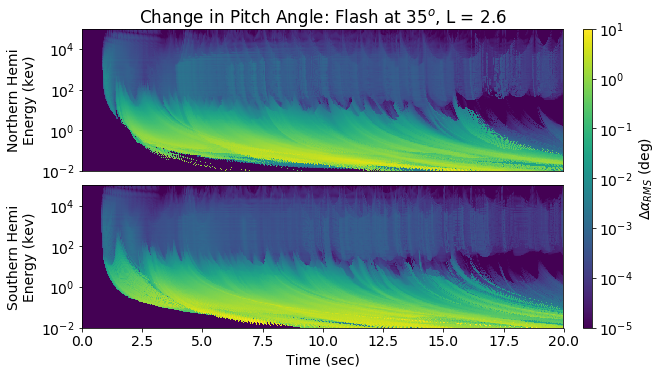

In [111]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 8 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


# print data.keys()
da_N = data['da_N']
da_S = data['da_S']
Lshells = data['params']['Lshells']
tvec    = data['params']['tvec']
evec    = data['params']['E_tot_arr']

print data['params'].keys()
print np.shape(da_N)
L_ind = 7
lon_ind = 0

print Lshells[L_ind]

clims = [-5, 1]


fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1, 0.02])
gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.


print gs
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
cbax = plt.subplot(gs[:,-1])
cmap = plt.get_cmap('viridis')

# Ndata = np.log10(np.sqrt(np.sum(da_N[L_ind-1:L_ind + 2, :,:-1], axis=0))*R2D)
Ndata = np.log10(np.sqrt(da_N[L_ind,:,:-1])*R2D)
Ndata[np.isinf(Ndata)] = -100
print np.max(Ndata), np.min(Ndata)
Sdata = np.log10(np.sqrt(da_S[L_ind,:,:-1])*R2D)
Sdata[np.isinf(Sdata)] = -100
# print np.max(Sdata), np.min(Sdata)
p0 = ax0.pcolormesh(tvec, np.log10(evec/1000.), Ndata, vmin = clims[0], vmax=clims[1], cmap = cmap)
p1 = ax1.pcolormesh(tvec, np.log10(evec/1000.), Sdata, vmin = clims[0], vmax=clims[1], cmap = cmap)


ax0.set_xticks([])
ytix = ax0.get_yticks()
yticklabels = ['$10^{%d}$'%k for k in ytix]
ax0.set_yticklabels(yticklabels)
ytix = ax1.get_yticks()
yticklabels = ['$10^{%d}$'%k for k in ytix]
ax1.set_yticklabels(yticklabels)

ax0.set_ylabel('Northern Hemi\nEnergy (kev)')
ax1.set_ylabel('Southern Hemi\nEnergy (kev)')
ax1.set_xlabel('Time (sec)')

cb = plt.colorbar(p0, cax=cbax)
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
cb.set_label('$\Delta \\alpha_{RMS}$ (deg)')

ax0.set_title('Change in Pitch Angle: Flash at %d$^o$, L = %.1f'%(35, Lshells[L_ind]))
gs.tight_layout(fig, pad=0,  rect=[0,0,1,1])
# fig.subplots_adjust()
# fig.tight_layout()

fig.savefig('dA_kp4_full.png',dpi=300)